In [6]:
from numpy import *
from time import sleep

def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat,labelMat

def selectJrand(i,m):
    j=i #we want to select any J not equal to i
    while (j==i):
        j = int(random.uniform(0,m))
    return j

def clipAlpha(aj,H,L):
    if aj > H: 
        aj = H
    if L > aj:
        aj = L
    return aj

def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    dataMatrix = mat(dataMatIn); labelMat = mat(classLabels).transpose()
    b = 0; m,n = shape(dataMatrix)
    alphas = mat(zeros((m,1)))
    iter = 0
    while (iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            fXi = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            Ei = fXi - float(labelMat[i])#if checks if an example violates KKT conditions
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                j = selectJrand(i,m)
                fXj = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print ("L==H"); continue
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print ("eta>=0"); continue
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): print ("j not moving enough"); continue
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])#update i by the same amount as j
                                                                        #the update is in the oppostie direction
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print ("iter: %d i:%d, pairs changed %d",iter,i,alphaPairsChanged)
        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0
        print ("iteration number: %d" , iter)
    return b,alphas


In [8]:
dataMat,labelMat = loadDataSet("testSet.txt")

In [85]:
dataMatrix = mat(dataMat)

labelMatrix = mat(labelMat)
alphaY = multiply(labelMatrix.T,alphas)
w = (alphaY.T * dataMatrix)

for j in range(100):
    if alphas[j] > 0:
        b = labelMat[j] - w * dataMatrix[j].T
        print ("b : %d",b)

b : %d [[-2.94503592]]
b : %d [[-2.53794671]]
b : %d [[-3.58334916]]
b : %d [[-3.03618981]]
b : %d [[-3.65174723]]
b : %d [[-3.52451459]]
b : %d [[-3.17434785]]
b : %d [[-2.89991856]]
b : %d [[-3.3888794]]
b : %d [[-3.03618981]]
b : %d [[-2.63166269]]
b : %d [[-2.74703432]]
b : %d [[-3.27943831]]
b : %d [[-3.58069044]]
b : %d [[-3.03496463]]
b : %d [[-2.85420236]]


In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

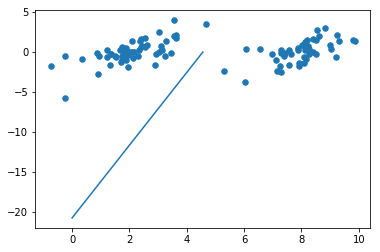

In [88]:
fig = plt.figure()
ax = plt.subplot(111)
xData = [example[0] for example in dataMat]
yData = [example[1] for example in dataMat]
plt.scatter(xData,yData,s=30)
plt.plot([0,-b / array(w)[0][0]],[-b / array(w)[0][1],0])
plt.show()

In [82]:
alphaY.T * dataMatrix

matrix([[ 0.62568741, -0.13727754]])

In [73]:
w

matrix([[ 0.67301886, -0.29561378]])

In [74]:
b

matrix([[-3.01973313]])

In [81]:
multiply(labelMatrix.T,alphas)

matrix([[ -4.88362305e-02],
        [ -2.19075198e-02],
        [  0.00000000e+00],
        [ -0.00000000e+00],
        [  0.00000000e+00],
        [  6.11490025e-17],
        [  0.00000000e+00],
        [ -0.00000000e+00],
        [ -9.02191922e-03],
        [ -0.00000000e+00],
        [ -0.00000000e+00],
        [ -0.00000000e+00],
        [ -0.00000000e+00],
        [  0.00000000e+00],
        [ -0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [ -0.00000000e+00],
        [  0.00000000e+00],
        [ -0.00000000e+00],
        [ -0.00000000e+00],
        [ -0.00000000e+00],
        [  0.00000000e+00],
        [ -0.00000000e+00],
        [ -0.00000000e+00],
        [  7.37257477e-18],
        [  2.47198095e-17],
        [ -0.00000000e+00],
        [ -0.00000000e+00],
        [ -3.02533045e-02],
        [ -6.46455463e-02],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [  0.00000000e+00],
        [ -0.0000000